In [33]:
import os
import sys
os.getcwd()
import pandas as pd
import numpy as np
import re
import gc
gc.collect()
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('C:/Users/admin/Documents/Nitin/mycodes/kaggle_google_quest_qna/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/admin/Documents/Nitin/mycodes/kaggle_google_quest_qna/data\sample_submission.csv
C:/Users/admin/Documents/Nitin/mycodes/kaggle_google_quest_qna/data\test.csv
C:/Users/admin/Documents/Nitin/mycodes/kaggle_google_quest_qna/data\train.csv


In [3]:
%%time
datadir = Path(dirname)

# Read in the data CSV files
train = pd.read_csv(datadir/'train.csv')
test = pd.read_csv(datadir/'test.csv')
sample_submission = pd.read_csv(datadir/'sample_submission.csv')

Wall time: 208 ms


In [ ]:
# Main contents: [question_title, question_body, answer]
#  Extra metadata: [host, url, category, question_user_page, question_user_name, answer_user_page, answer_user_name]

In [4]:
sample_submission.columns
print('total targets', len([a for a in sample_submission.columns if 'question_' in a or 'answer_' in a]))
print('question targets', len([a for a in sample_submission.columns if 'question_' in a]))
print('Answer targets', len([a for a in sample_submission.columns if 'answer_' in a]))

total targets 30
question targets 21
Answer targets 9


In [5]:
train0 = train.iloc[0]

print('URL           : ', train0['url'])
print('question_title: ', train0['question_title'])
print('question_body : ', train0['question_body'])

URL           :  http://photo.stackexchange.com/questions/9169/what-am-i-losing-when-using-extension-tubes-instead-of-a-macro-lens
question_title:  What am I losing when using extension tubes instead of a macro lens?
question_body :  After playing around with macro photography on-the-cheap (read: reversed lens, rev. lens mounted on a straight lens, passive extension tubes), I would like to get further with this. The problems with the techniques I used is that focus is manual and aperture control is problematic at best. This limited my setup to still subjects (read: dead insects) Now, as spring is approaching, I want to be able to shoot live insects. I believe that for this, autofocus and settable aperture will be of great help.

So, one obvious but expensive option is a macro lens (say, EF 100mm Macro) However, I am not really interested in yet another prime lens. An alternative is the electrical extension tubes.

Except for maximum focusing distance, what am I losing when using tubes 

In [6]:
train[['url', 'question_user_name', 'question_user_page', 'answer_user_name', 'answer_user_page', 'url', 'category', 'host']]


,url,question_user_name,question_user_page,answer_user_name,answer_user_page,url,category,host
0,http://photo.stackexchange.com/questions/9169/...,ysap,https://photo.stackexchange.com/users/1024,rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,photo.stackexchange.com
1,http://rpg.stackexchange.com/questions/47820/w...,russellpierce,https://rpg.stackexchange.com/users/8774,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,rpg.stackexchange.com
2,http://electronics.stackexchange.com/questions...,Joe Baker,https://electronics.stackexchange.com/users/10157,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,electronics.stackexchange.com
3,http://judaism.stackexchange.com/questions/551...,Scimonster,https://judaism.stackexchange.com/users/5151,Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,judaism.stackexchange.com
4,http://graphicdesign.stackexchange.com/questio...,leigero,https://graphicdesign.stackexchange.com/users/...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,graphicdesign.stackexchange.com
5,http://stackoverflow.com/questions/23815544/co...,Joe,https://stackoverflow.com/users/2888211,Raidri,https://stackoverflow.com/users/2610249,http://stackoverflow.com/questions/23815544/co...,STACKOVERFLOW,stackoverflow.com
6,http://askubuntu.com/questions/642656/core-fil...,maximb,https://askubuntu.com/users/425067,muru,https://askubuntu.com/users/158442,http://askubuntu.com/questions/642656/core-fil...,TECHNOLOGY,askubuntu.com
7,http://gaming.stackexchange.com/questions/1675...,LoveMeSomeCode,https://gaming.stackexchange.com/users/7157,VoltaicShock,https://gaming.stackexchange.com/users/8419,http://gaming.stackexchange.com/questions/1675...,CULTURE,gaming.stackexchange.com
8,http://serverfault.com/questions/240076,Tim Britton,https://serverfault.com/users/72141,colealtdelete,https://serverfault.com/users/47027,http://serverfault.com/questions/240076,TECHNOLOGY,serverfault.com
9,http://gaming.stackexchange.com/questions/1479...,Nick Heiner,https://gaming.stackexchange.com/users/31532,Dewi Rees,https://gaming.stackexchange.com/users/43859,http://gaming.stackexchange.com/questions/1479...,CULTURE,gaming.stackexchange.com


In [13]:
target_cols = ['question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfaction', 'answer_type_instructions',
       'answer_type_procedure', 'answer_type_reason_explanation',
       'answer_well_written']
len(target_cols)

30

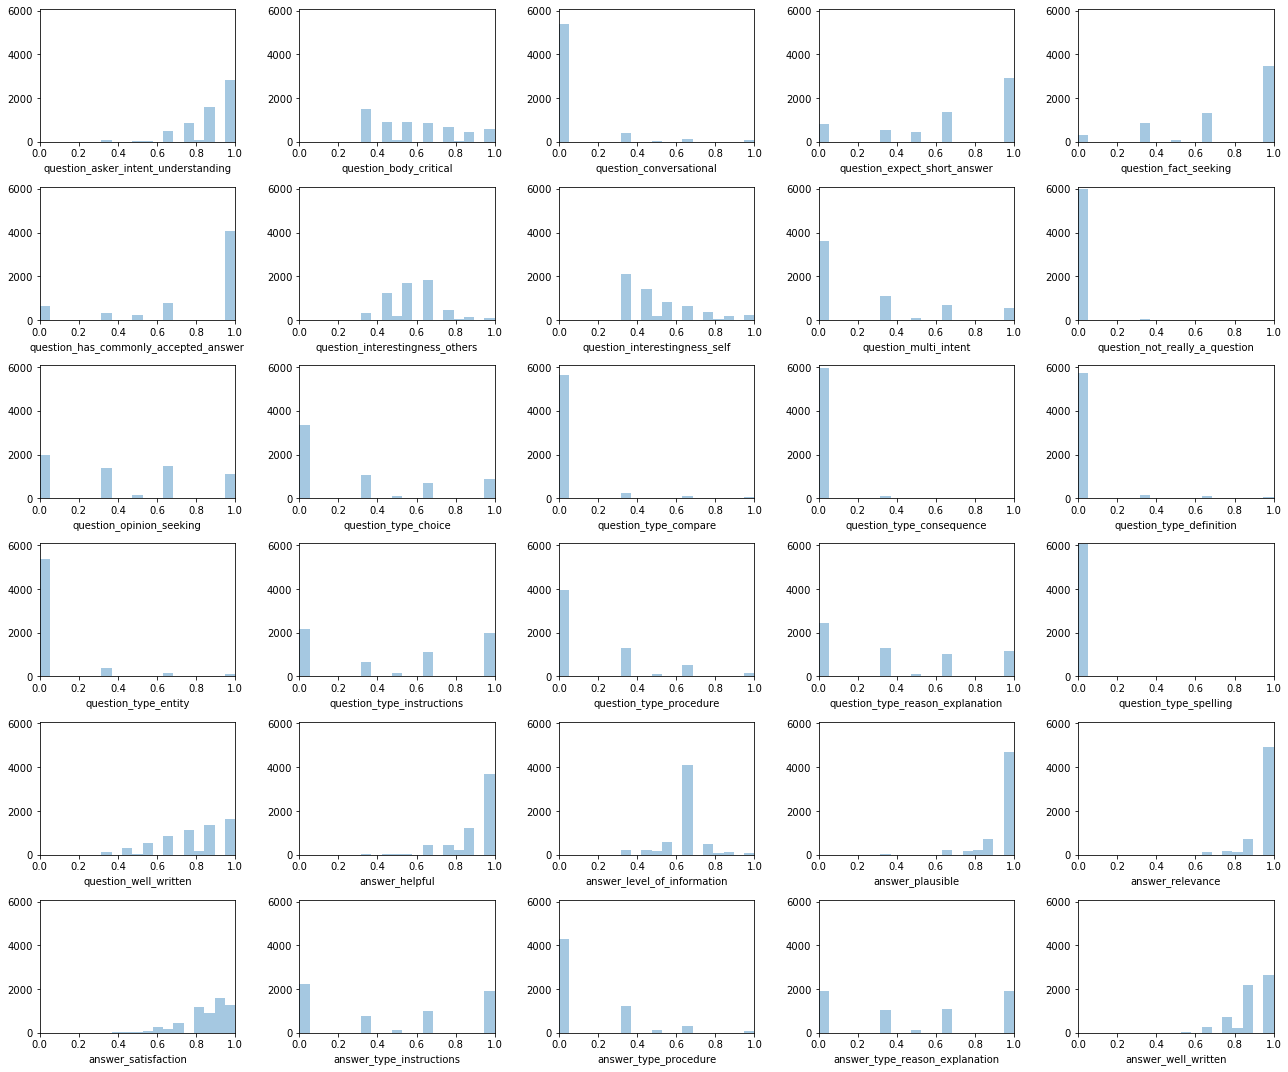

In [17]:
fig, axes = plt.subplots(6, 5, figsize=(18, 15))
axes = axes.ravel()
bins = np.linspace(0, 1, 20)

for i, col in enumerate(target_cols):
    ax = axes[i]
    sns.distplot(train[col], label=col, kde=False, bins=bins, ax=ax)
    # ax.set_title(col)
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 6079])
plt.tight_layout()
plt.show()
plt.close()

In [25]:
#test.isna().sum()
train_category = train['category'].value_counts()
test_category = test['category'].value_counts()

Train/Test category distribution


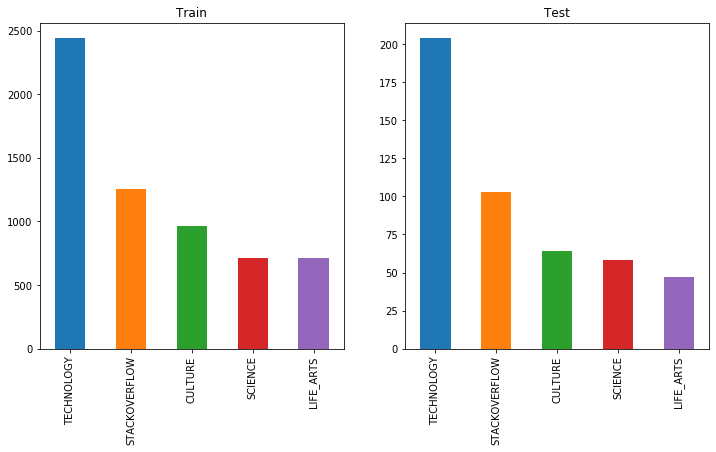

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
train_category.plot(kind='bar', ax=axes[0])
axes[0].set_title('Train')
test_category.plot(kind='bar', ax=axes[1])
axes[1].set_title('Test')
print('Train/Test category distribution')
plt.show()

Training data Word Cloud


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


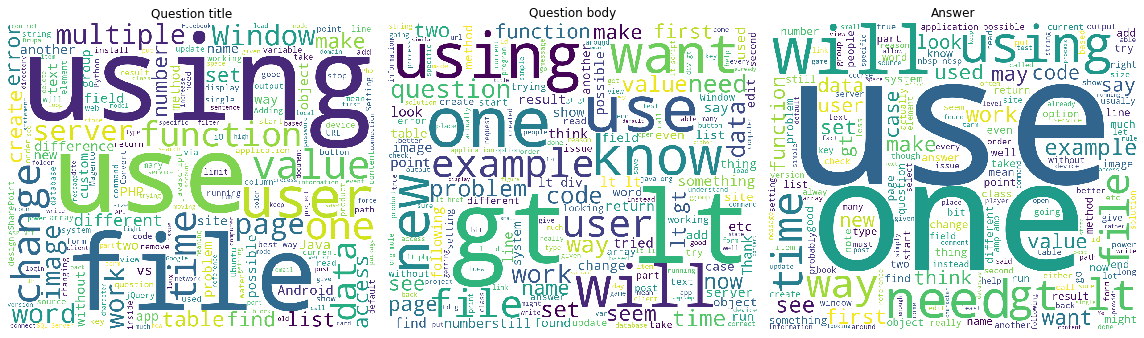

In [34]:
from wordcloud import WordCloud


def plot_wordcloud(text, ax, title=None):
    wordcloud = WordCloud(max_font_size=None, background_color='white',
                          width=1200, height=1000).generate(text_cat)
    ax.imshow(wordcloud)
    if title is not None:
        ax.set_title(title)
    ax.axis("off")
    
print('Training data Word Cloud')

fig, axes = plt.subplots(1, 3, figsize=(16, 18))

text_cat = ' '.join(train['question_title'].values)
plot_wordcloud(text_cat, axes[0], 'Question title')

text_cat = ' '.join(train['question_body'].values)
plot_wordcloud(text_cat, axes[1], 'Question body')

text_cat = ' '.join(train['answer'].values)
plot_wordcloud(text_cat, axes[2], 'Answer')

plt.tight_layout()
fig.show()

Test data Word Cloud


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


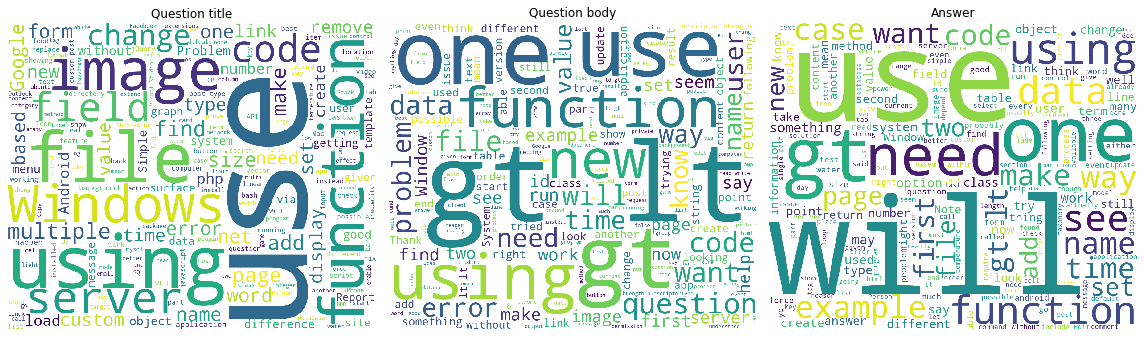

In [35]:
print('Test data Word Cloud')

fig, axes = plt.subplots(1, 3, figsize=(16, 18))

text_cat = ' '.join(test['question_title'].values)
plot_wordcloud(text_cat, axes[0], 'Question title')

text_cat = ' '.join(test['question_body'].values)
plot_wordcloud(text_cat, axes[1], 'Question body')

text_cat = ' '.join(test['answer'].values)
plot_wordcloud(text_cat, axes[2], 'Answer')

plt.tight_layout()
fig.show()

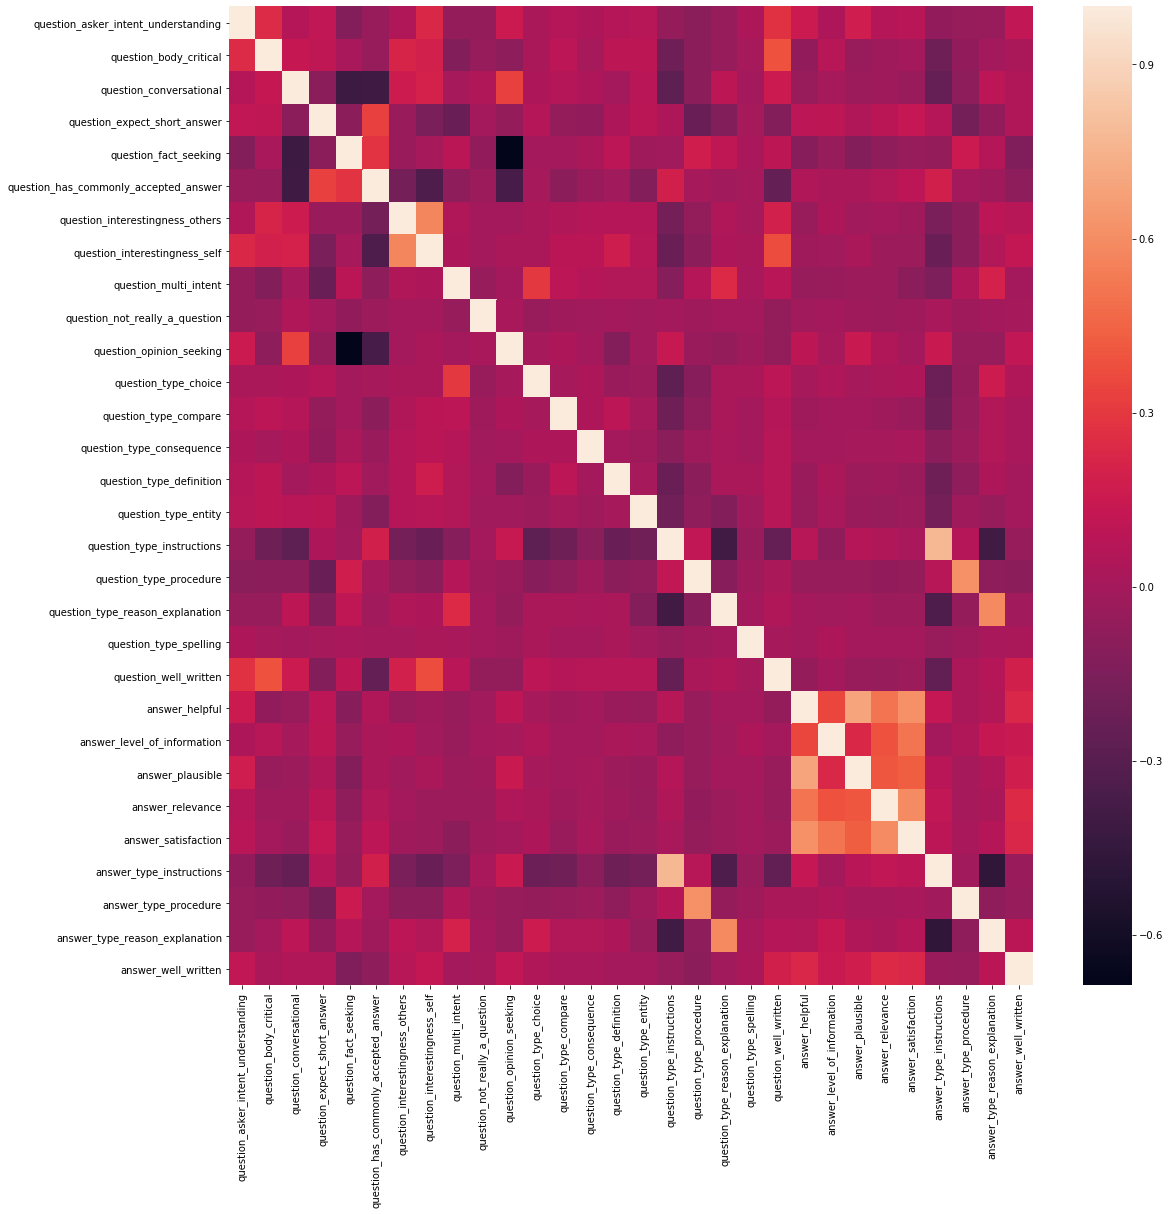

In [36]:
fig, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(train[target_cols].corr(), ax=ax)

In [37]:
train_question_user = train['question_user_name'].unique()
test_question_user = test['question_user_name'].unique()

print('Number of unique question user in train: ', len(train_question_user))
print('Number of unique question user in test : ', len(test_question_user))
print('Number of unique question user in both train & test : ', len(set(train_question_user) & set(test_question_user)))

Number of unique question user in train:  3215
Number of unique question user in test :  467
Number of unique question user in both train & test :  37


In [39]:
def char_count(s):
    return len(s)

def word_count(s):
    return s.count(' ')

train['question_title_n_chars'] = train['question_title'].apply(char_count)
train['question_title_n_words'] = train['question_title'].apply(word_count)
train['question_body_n_chars'] = train['question_body'].apply(char_count)
train['question_body_n_words'] = train['question_body'].apply(word_count)
train['answer_n_chars'] = train['answer'].apply(char_count)
train['answer_n_words'] = train['answer'].apply(word_count)

test['question_title_n_chars'] = test['question_title'].apply(char_count)
test['question_title_n_words'] = test['question_title'].apply(word_count)
test['question_body_n_chars'] = test['question_body'].apply(char_count)
test['question_body_n_words'] = test['question_body'].apply(word_count)
test['answer_n_chars'] = test['answer'].apply(char_count)
test['answer_n_words'] = test['answer'].apply(word_count)

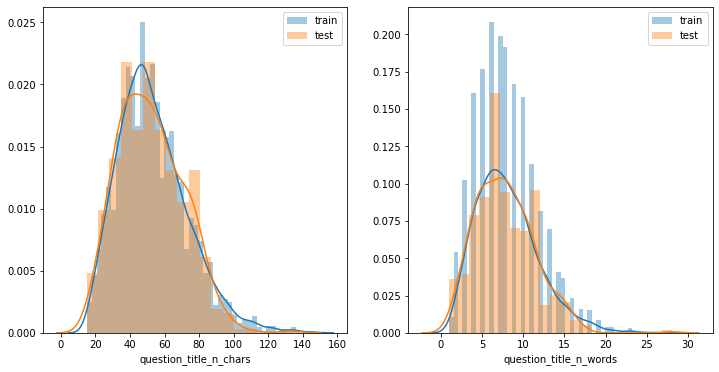

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(train['question_title_n_chars'], label='train', ax=axes[0])
sns.distplot(test['question_title_n_chars'], label='test', ax=axes[0])
axes[0].legend()
sns.distplot(train['question_title_n_words'], label='train', ax=axes[1])
sns.distplot(test['question_title_n_words'], label='test', ax=axes[1])
axes[1].legend()

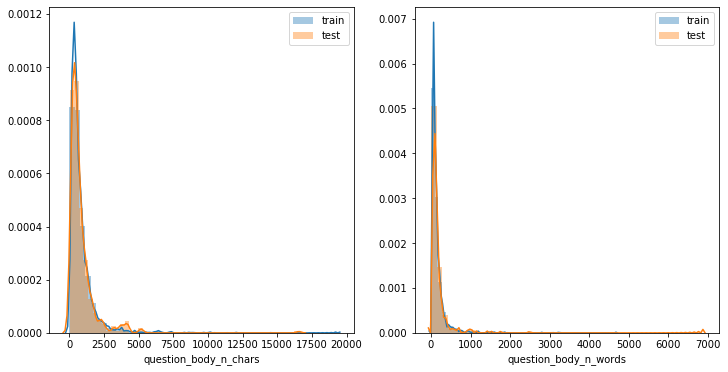

In [47]:
fig,axes = plt.subplots(1,2,figsize = (12,6))
sns.distplot(train['question_body_n_chars'], label='train', ax=axes[0])
sns.distplot(test['question_body_n_chars'], label='test', ax=axes[0])
axes[0].legend()
sns.distplot(train['question_body_n_words'], label='train', ax=axes[1])
sns.distplot(test['question_body_n_words'], label='test', ax=axes[1])
axes[1].legend()

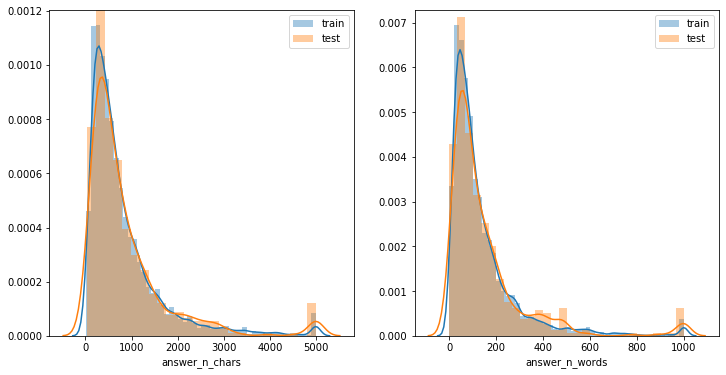

In [48]:
train['answer_n_chars'].clip(0, 5000, inplace=True)
test['answer_n_chars'].clip(0, 5000, inplace=True)
train['answer_n_words'].clip(0, 1000, inplace=True)
test['answer_n_words'].clip(0, 1000, inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(train['answer_n_chars'], label='train', ax=axes[0])
sns.distplot(test['answer_n_chars'], label='test', ax=axes[0])
axes[0].legend()
sns.distplot(train['answer_n_words'], label='train', ax=axes[1])
sns.distplot(test['answer_n_words'], label='test', ax=axes[1])
axes[1].legend()

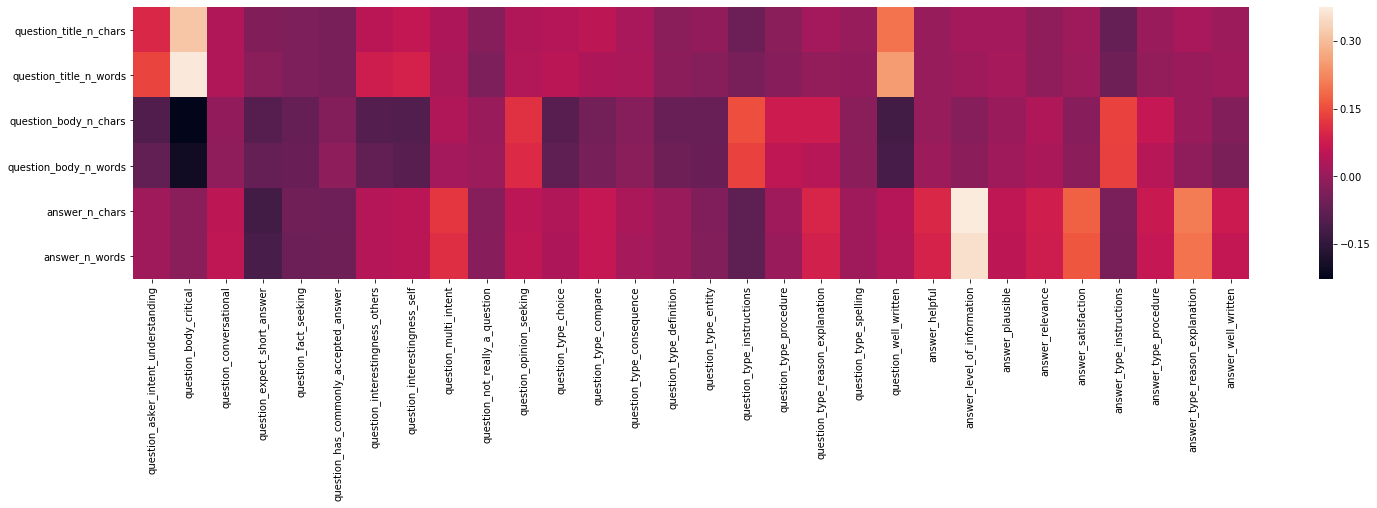

In [51]:
number_feature_cols = ['question_title_n_chars', 'question_title_n_words', 'question_body_n_chars', 'question_body_n_words', 'answer_n_chars', 'answer_n_words']
# train[number_feature_cols].corrwith(train[target_cols], axis=0)

from scipy.spatial.distance import cdist

def calc_corr(df, x_cols, y_cols):
    arr1 = df[x_cols].T.values
    arr2 = df[y_cols].T.values
    corr_df = pd.DataFrame(1 - cdist(arr2, arr1, metric='correlation'), index=y_cols, columns=x_cols)
    return corr_df

corr_df = calc_corr(train, target_cols, number_feature_cols)
fig, ax = plt.subplots(figsize=(25, 5))
sns.heatmap(corr_df, ax=ax)

In [61]:
train[target_cols].median()
#print(train['question_title'].min())
#print(train['question_title'].max())

question_asker_intent_understanding      0.888889
question_body_critical                   0.555556
question_conversational                  0.000000
question_expect_short_answer             0.666667
question_fact_seeking                    1.000000
question_has_commonly_accepted_answer    1.000000
question_interestingness_others          0.555556
question_interestingness_self            0.444444
question_multi_intent                    0.000000
question_not_really_a_question           0.000000
question_opinion_seeking                 0.333333
question_type_choice                     0.000000
question_type_compare                    0.000000
question_type_consequence                0.000000
question_type_definition                 0.000000
question_type_entity                     0.000000
question_type_instructions               0.666667
question_type_procedure                  0.000000
question_type_reason_explanation         0.333333
question_type_spelling                   0.000000
